### Quantiative Data Analysis 1 for KAP info

##### Doing quantitative data analysis on KAP, demographic, social desirability, and SGD related data

###### 19/07/2021 at 20:21 CEST

Use: https://pythonfordatascienceorg.wordpress.com/paired-samples-t-test-python/
* "A paired sample t-test was used to analyze the blood pressure before and after 
the intervention to test if the intervention had a significant affect on the blood
pressure. The blood pressure before the intervention was higher (156.45 ± 11.39 units) 
compared to the blood pressure post intervention (151.36 ± 14.18 units); there was a 
statistically significant decrease in blood pressure (t(119)=3.34, p= 0.0011) of 5.09 units."

In [231]:
# import necessary libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn-pastel')
import pingouin as pg
from pingouin import ancova

# import stats from scipy
from scipy import stats

In [2]:
# change working directory to a specified directory
os.chdir('../')
print("Directory Changes")

# Get current working directory
cwd = os.getcwd()
print("Current working directory is:", cwd)

Directory Changes
Current working directory is: C:\Users\Carol\Documents\EPA_2020_2021\Thesis\Analysis\KAP_Analysis


In [130]:
# read in csv data
kap_data = pd.read_csv("data/interim/kap_sd_practice_clean.csv")
sgd_data = pd.read_csv("data/interim/sgd_sd_practice_clean.csv")

# Analysis

### Look into:

#### Part 1: Without SD Score

Within Subject changes:
* Pre-Post Test Survey WITHOUT sd score, Paired Sample T - Test

Between Subject changes:
* ANOVA test where the dependent variable is: 1) gender; 2) age; 3) race; 4) profession WITHOUT sd score

#### Part 2: With SD Score

Within Subject changes:
* Pre-Post Test Survey WITH sd score,  Paired Sample T - Test

Between Subject changes:
* ANOVA test where the dependent variable is: 1) gender; 2) age; 3) race; 4) profession WITH sd score

#### Part 3: Integrating SGD Data into the Analysis
* Integrating SGD Data and Social Desirability Score



*Note that the sd score can only be applied to attitude and practice related questions and NOT questions related to knowledge

## Part 1: Without Social Desirability Score

### Paired Sample T-Test

In [4]:
# gain insight into kap_data
kap_data.head()

,RandomID,pre mean a_pc,pre mean a_er,pre mean p_pc,pre mean k_pc,post mean a_pc,post mean a_er,post mean p_pc,post mean k_pc,diff_a_pc,diff_a_er,diff_p_pc,diff_k_pc,gender,age,race,profession,sd_score
0,1034343201,2.333333,5.000000,4.333333,1.0,1.666667,5.000000,3.333333,1.000000,-0.666667,0.0,-1.000000,0.000000,Male,18 - 24,White or Caucasian,Community member,0.538462
1,3489602219,2.000000,3.333333,5.000000,1.0,2.000000,3.333333,4.000000,1.000000,0.000000,0.0,-1.000000,0.000000,Male,25 - 34,A race/ethnicity not listed here,Community member,0.384615
2,9025272566,3.333333,5.000000,2.666667,1.0,2.666667,5.000000,3.333333,0.666667,-0.666667,0.0,0.666667,-0.333333,Female,55 - 64,White or Caucasian,Community member,0.230769
3,7671412241,2.000000,4.666667,3.666667,1.0,2.333333,4.666667,3.333333,0.666667,0.333333,0.0,-0.333333,-0.333333,Female,25 - 34,White or Caucasian,Community member,0.846154
4,7124352876,2.000000,2.666667,2.333333,1.0,2.000000,2.666667,2.666667,1.000000,0.000000,0.0,0.333333,0.000000,Male,18 - 24,Asian or Pacific Islander,Community member,0.846154


In [5]:
# gain insight into "pre mean a_er" and "post mean a_er"
kap_data[['pre mean a_er', 'post mean a_er']].describe()

,pre mean a_er,post mean a_er
count,7.000000,7.000000
mean,4.190476,4.190476
std,0.878912,0.878912
min,2.666667,2.666667
25%,3.833333,3.833333
50%,4.333333,4.333333
75%,4.833333,4.833333
max,5.000000,5.000000


In [6]:
# gain insight into "pre mean a_pc" and "post mean a_pc"
kap_data[['pre mean a_pc', 'post mean a_pc']].describe()

,pre mean a_pc,post mean a_pc
count,7.000000,7.000000
mean,2.333333,2.190476
std,0.745356,0.662687
min,1.333333,1.333333
25%,2.000000,1.833333
50%,2.000000,2.000000
75%,2.833333,2.500000
max,3.333333,3.333333


In [7]:
# gain insight into "pre mean p_pc" and "post mean p_pc"
kap_data[['pre mean p_pc', 'post mean p_pc']].describe()

,pre mean p_pc,post mean p_pc
count,7.000000,7.000000
mean,3.476190,3.380952
std,0.939999,0.404995
min,2.333333,2.666667
25%,2.833333,3.333333
50%,3.333333,3.333333
75%,4.000000,3.500000
max,5.000000,4.000000


In [8]:
# gain insight into "pre mean k_pc" and "post mean k_pc"
kap_data[['pre mean k_pc', 'post mean k_pc']].describe()

,pre mean k_pc,post mean k_pc
count,7.0,7.000000
mean,1.0,0.904762
std,0.0,0.162650
min,1.0,0.666667
25%,1.0,0.833333
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,1.000000


#### Testing for normal distribution

In [10]:
# pre a_er
# test that 'pre mean a_er'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data['pre mean a_er'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

# The Shapiro-Wilk test p-value is greater than p = 0.05, therefore failing to reject  
#H0 (the null hypothesis), concluding the data are normally distributed

ShapiroResult(statistic=0.8681932091712952, pvalue=0.17897874116897583)

In [11]:
# post a_er
# test that 'post mean a_er'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data['post mean a_er'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.8681932091712952, pvalue=0.17897874116897583)

In [12]:
# pre a_pc
# test that 'pre mean a_pc'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data['pre mean a_pc'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.8642312288284302, pvalue=0.16512705385684967)

In [13]:
# post a_pc
# test that 'post mean a_pc'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data['post mean a_pc'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.9670490026473999, pvalue=0.8764201402664185)

In [14]:
# pre p_pc
# test that 'pre mean p_pc'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data['pre mean p_pc'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.9640378952026367, pvalue=0.8525364398956299)

In [15]:
# post p_pc
# test that 'pre mean p_pc'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data['post mean p_pc'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.8822838664054871, pvalue=0.236780047416687)

In [16]:
# pre k_pc
# test that 'pre mean k_pc'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data['pre mean k_pc'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1678: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


ShapiroResult(statistic=1.0, pvalue=1.0)

In [17]:
# pre p_pc
# test that 'pre mean k_pc'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data['post mean k_pc'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.6003988981246948, pvalue=0.0002751764259301126)

#### T tests

In [223]:
# calculating degrees of freedom, df:
df = (kap_data.RandomID.count())-1

In [19]:
# a_er t-test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)
stats.ttest_ind(kap_data.dropna()['pre mean a_er'], kap_data.dropna()['post mean a_er'])

#  p-value (1) is greater than significance level = 0.05. 
# Paired samples t-test fails to reject the null hypothesis:
# "mean pre a_er" and "mean post a_er" are very similar

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [20]:
# a_pc t-test
stats.ttest_rel(kap_data['pre mean a_pc'], kap_data['post mean a_pc'], nan_policy = 'omit')

#  p-value (0.36) is greater than significance level = 0.05. 
# Paired samples t-test fails to reject the null hypothesis:
# "mean pre a_pc" and "mean post a_pc" are very similar

Ttest_relResult(statistic=1.0000000000000002, pvalue=0.355917683749582)

In [21]:
# p_pc t-test
stats.ttest_rel(kap_data['pre mean p_pc'], kap_data['post mean p_pc'], nan_policy = 'omit')

#  p-value (0.74) is greater than significance level = 0.05. 
# Paired samples t-test fails to reject the null hypothesis:
# "mean pre a_pc" and "mean post a_pc" are very similar

Ttest_relResult(statistic=0.3535533905932739, pvalue=0.7357648598798119)

In [22]:
# k_pc t-test
stats.ttest_rel(kap_data['pre mean k_pc'], kap_data['post mean k_pc'], nan_policy = 'omit')

#  p-value (0.17) is greater than significance level = 0.05. 
# Paired samples t-test fails to reject the null hypothesis:
# "mean pre a_pc" and "mean post a_pc" are very similar

Ttest_relResult(statistic=1.549193338482967, pvalue=0.17230829673040005)

#### Historgrams, Boxplots, and Parallel Axis Dot Plot of pre/post intervention data - Accompanying visualizations to the T tests

In [68]:
# make kap_data_tidy for histogram plotting
kap_data_tidy = kap_data.melt(id_vars=['RandomID','gender', 'race', 'profession', 'age'])
kap_data_tidy.value = pd.to_numeric(kap_data_tidy.value)

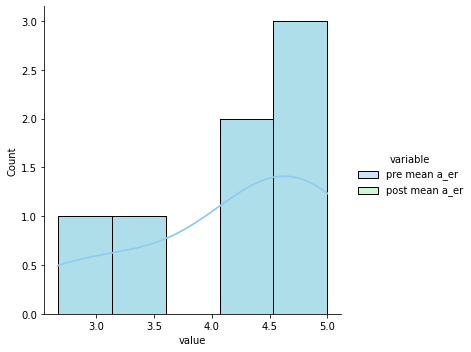

In [73]:
#a_er histograms
sns.displot(data=kap_data_tidy[kap_data_tidy['variable'].isin(["pre mean a_er", "post mean a_er"])], x="value", hue="variable", bins=5, kde=True)

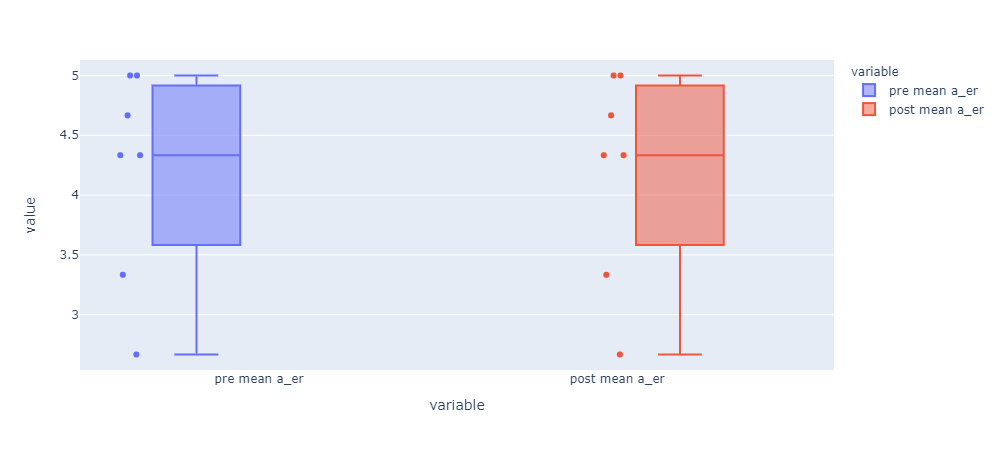

In [87]:
#a_er boxplots
fig = px.box(kap_data_tidy[kap_data_tidy['variable'].isin(["pre mean a_er", "post mean a_er"])], x="variable", y='value', color="variable", points="all")
fig.show()

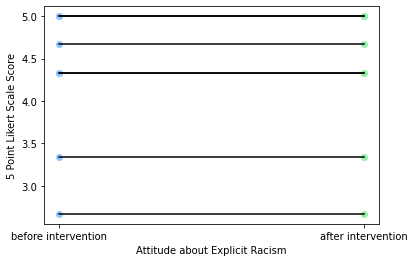

In [179]:
#a_er
#  input data:
befores = kap_data['pre mean a_er']
afters = kap_data['post mean a_er']

# plotting the points
plt.scatter(np.zeros(len(befores)), befores)
plt.scatter(np.ones(len(afters)), afters)

# plotting the lines
for i in range(len(befores)):
    plt.plot( [0,1], [befores[i], afters[i]], c='k')

plt.xticks([0,1], ['before intervention', 'after intervention'])
plt.xlabel("Attitude about Explicit Racism")
plt.ylabel("5 Point Likert Scale Score")

plt.show()

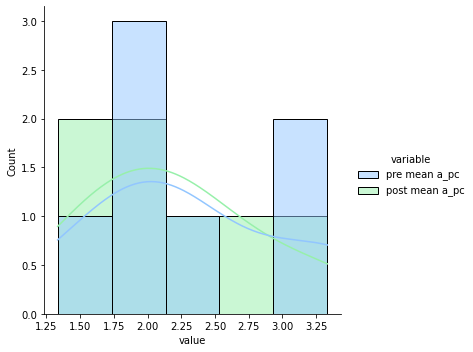

In [74]:
#a_pc histograms
# sns.distplot(kap_data['pre mean a_pc'], bins=3)
# sns.distplot(kap_data['post mean a_pc'], bins=3)
sns.displot(kap_data_tidy[kap_data_tidy['variable'].isin(["pre mean a_pc", "post mean a_pc"])], x="value", hue="variable", bins=5, kde=True)

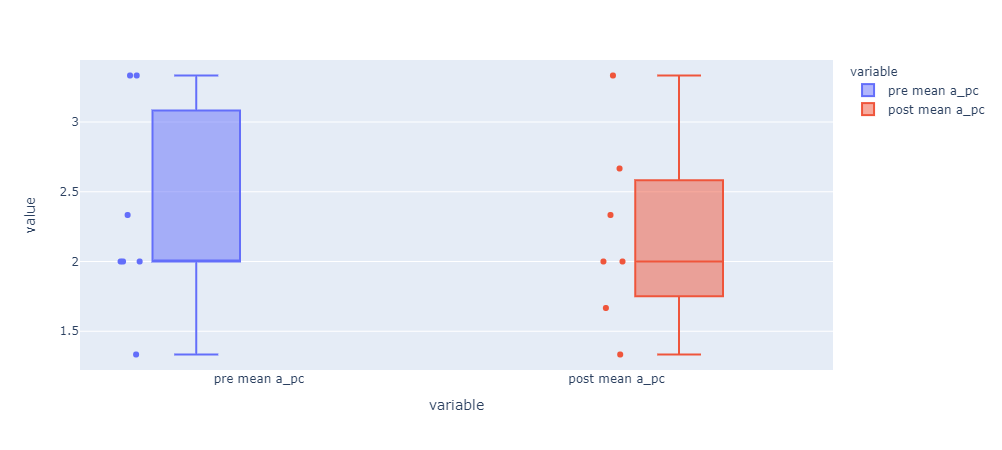

In [86]:
#a_pc boxplots
fig = px.box(kap_data_tidy[kap_data_tidy['variable'].isin(["pre mean a_pc", "post mean a_pc"])], x="variable", y='value', color="variable", points="all")
fig.show()

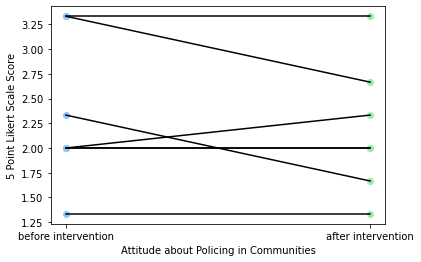

In [178]:
#a_pc
#  input data:
befores = kap_data['pre mean a_pc']
afters = kap_data['post mean a_pc']

# plotting the points
plt.scatter(np.zeros(len(befores)), befores)
plt.scatter(np.ones(len(afters)), afters)

# plotting the lines
for i in range(len(befores)):
    plt.plot( [0,1], [befores[i], afters[i]], c='k')

plt.xticks([0,1], ['before intervention', 'after intervention'])
plt.xlabel("Attitude about Policing in Communities")
plt.ylabel("5 Point Likert Scale Score")

plt.show()

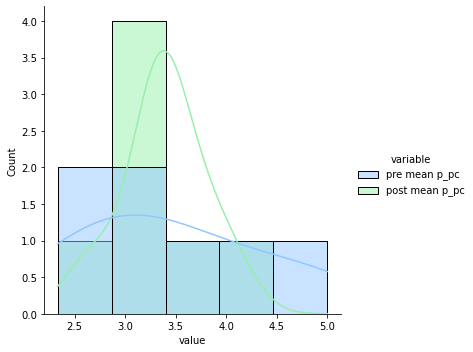

In [83]:
#p_pc histograms
sns.displot(kap_data_tidy[kap_data_tidy['variable'].isin(["pre mean p_pc", "post mean p_pc"])], x="value", hue="variable", bins=5, kde=True)

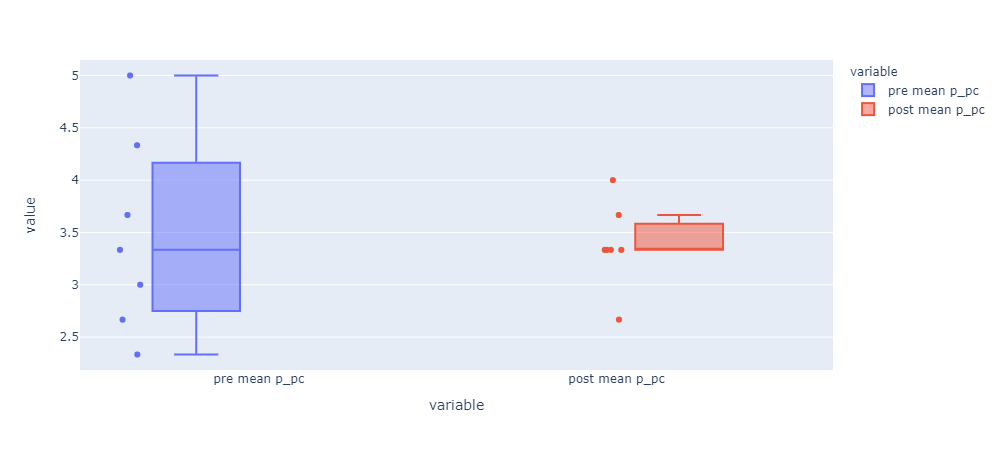

In [88]:
#p_pc boxplots
fig = px.box(kap_data_tidy[kap_data_tidy['variable'].isin(["pre mean p_pc", "post mean p_pc"])], x="variable", y='value', color="variable", points="all")
fig.show()

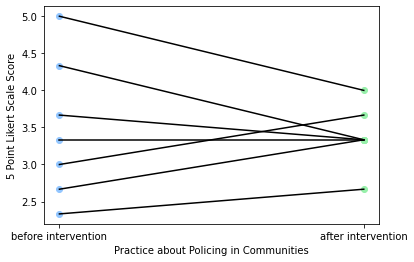

In [177]:
#p_pc
#  input data:
befores = kap_data['pre mean p_pc']
afters = kap_data['post mean p_pc']

# plotting the points
plt.scatter(np.zeros(len(befores)), befores)
plt.scatter(np.ones(len(afters)), afters)

# plotting the lines
for i in range(len(befores)):
    plt.plot( [0,1], [befores[i], afters[i]], c='k')

plt.xticks([0,1], ['before intervention', 'after intervention'])
plt.xlabel("Practice about Policing in Communities")
plt.ylabel("5 Point Likert Scale Score")

plt.show()

C:\Users\Carol\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



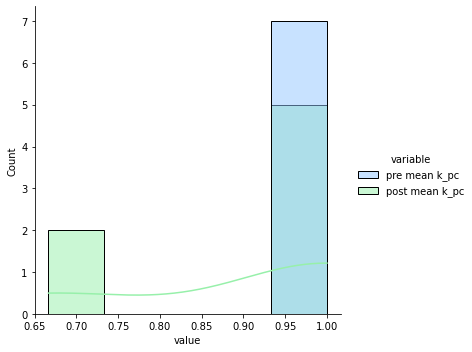

In [84]:
#k_pc histograms
sns.displot(kap_data_tidy[kap_data_tidy['variable'].isin(["pre mean k_pc", "post mean k_pc"])], x="value", hue="variable", bins=5, kde=True)

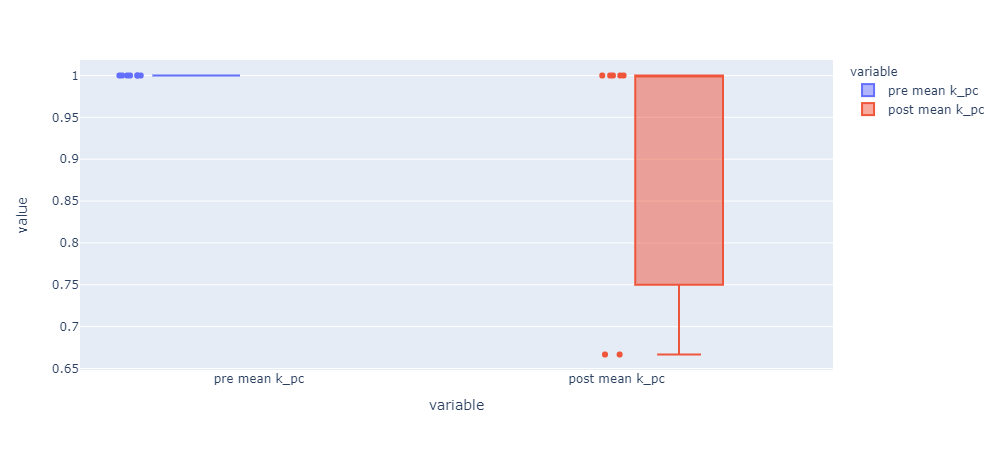

In [89]:
#k_pc boxplots
fig = px.box(kap_data_tidy[kap_data_tidy['variable'].isin(["pre mean k_pc", "post mean k_pc"])], x="variable", y='value', color="variable", points="all")
fig.show()

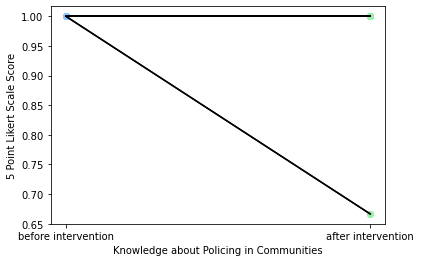

In [176]:
#k_pc
#  input data:
befores = kap_data['pre mean k_pc']
afters = kap_data['post mean k_pc']

# plotting the points
plt.scatter(np.zeros(len(befores)), befores)
plt.scatter(np.ones(len(afters)), afters)

# plotting the lines
for i in range(len(befores)):
    plt.plot( [0,1], [befores[i], afters[i]], c='k')

plt.xticks([0,1], ['before intervention', 'after intervention'])
plt.xlabel("Knowledge about Policing in Communities")
plt.ylabel("5 Point Likert Scale Score")

plt.show()

### ANOVA Test

https://pingouin-stats.org/generated/pingouin.anova.html
https://www.scribbr.com/statistics/two-way-anova/
https://janhove.github.io/analysis/2014/08/14/pretest-posttest-ancova

In [ ]:
#Between Subject changes:

# (https://www.youtube.com/watch?v=q_idm_QnVEY)

# 280882605_Analyzing_change_between_two_or_more_groups_ANOVA_versus_ANCOVA

# these techniques address related research quetions, but can lead to different conclusions - Lord's paradox
# ANOVA - analysis of variance on change scores
# ANCOVA - analysis of covariace partialiing out initial scores
# for most development research the ANCOVA is preferred over ANOVA
# ANOVA: change in K, A, and P varied by gender, age, race, and profession - subtract the initial from final (i.e. change or difference) and see if this difference is associated with the dependent variables

#### ANOVA: Gender & KAP

In [250]:
#a_er gender ANOVA
aov = pg.anova(data=kap_data, dv='post mean a_er', between='gender', detailed=True)
print(aov)

   Source        SS  DF        MS         F    p-unc       np2
0  gender  1.190476   1  1.190476  1.728111  0.24572  0.256849
1  Within  3.444444   5  0.688889       NaN      NaN       NaN


In [251]:
#a_pc gender ANOVA
aov = pg.anova(data=kap_data, dv='post mean a_pc', between='gender', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc      np2
0  gender  0.033069   1  0.033069  0.063549  0.811007  0.01255
1  Within  2.601852   5  0.520370       NaN       NaN      NaN


In [252]:
#p_pc gender ANOVA
aov = pg.anova(data=kap_data, dv='post mean p_pc', between='gender', detailed=True)
print(aov)

   Source        SS  DF        MS        F     p-unc       np2
0  gender  0.021164   1  0.021164  0.10989  0.753712  0.021505
1  Within  0.962963   5  0.192593      NaN       NaN       NaN


In [253]:
#k_pc gender ANOVA
aov = pg.anova(data=kap_data, dv='post mean k_pc', between='gender', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0  gender  0.084656   1  0.084656  5.714286  0.062352  0.533333
1  Within  0.074074   5  0.014815       NaN       NaN       NaN


#### ANOVA: Age & KAP

In [254]:
#a_er age ANOVA
aov = pg.anova(data=kap_data, dv='post mean a_er', between='age', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc      np2
0     age  0.783069   2  0.391534  0.406593  0.690644  0.16895
1  Within  3.851852   4  0.962963       NaN       NaN      NaN


In [255]:
#a_pc age ANOVA
aov = pg.anova(data=kap_data, dv='post mean a_pc', between='age', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0     age  1.449735   2  0.724868  2.446429  0.202319  0.550201
1  Within  1.185185   4  0.296296       NaN       NaN       NaN


In [256]:
#p_pc age ANOVA
aov = pg.anova(data=kap_data, dv='post mean p_pc', between='age', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0     age  0.169312   2  0.084656  0.415584  0.685513  0.172043
1  Within  0.814815   4  0.203704       NaN       NaN       NaN


In [257]:
#k_pc age ANOVA
aov = pg.anova(data=kap_data, dv='post mean k_pc', between='age', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0     age  0.084656   2  0.042328  2.285714  0.217778  0.533333
1  Within  0.074074   4  0.018519       NaN       NaN       NaN


#### ANOVA: Race & KAP

In [258]:
#a_er race ANOVA
aov = pg.anova(data=kap_data, dv='post mean a_er', between='race', detailed=True)
print(aov)

   Source        SS  DF        MS          F     p-unc      np2
0    race  4.190476   2  2.095238  18.857143  0.009195  0.90411
1  Within  0.444444   4  0.111111        NaN       NaN      NaN


In [259]:
#a_pc race ANOVA
aov = pg.anova(data=kap_data, dv='post mean a_pc', between='race', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0    race  0.101587   2  0.050794  0.080201  0.924378  0.038554
1  Within  2.533333   4  0.633333       NaN       NaN       NaN


In [260]:
#p_pc race ANOVA
aov = pg.anova(data=kap_data, dv='post mean p_pc', between='race', detailed=True)
print(aov)

   Source        SS  DF        MS          F     p-unc       np2
0    race  0.895238   2  0.447619  20.142857  0.008158  0.909677
1  Within  0.088889   4  0.022222        NaN       NaN       NaN


In [261]:
#k_pc race ANOVA
aov = pg.anova(data=kap_data, dv='post mean k_pc', between='race', detailed=True)
print(aov)

   Source        SS  DF        MS         F   p-unc   np2
0    race  0.025397   2  0.012698  0.380952  0.7056  0.16
1  Within  0.133333   4  0.033333       NaN     NaN   NaN


#### ANOVA: Profession & KAP

In [262]:
#a_er profession ANOVA
# error atm bc only 1 category exists rn for "profession" as a result of who was tested
aov = pg.anova(data=kap_data, dv='post mean a_er', between='profession', detailed=True)
print(aov)

       Source        SS  DF        MS  np2
0  profession  0.000000   0       NaN  0.0
1      Within  4.634921   6  0.772487  NaN


C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal



In [263]:
#a_pc profession ANOVA
aov = pg.anova(data=kap_data, dv='post mean a_pc', between='profession', detailed=True)
print(aov)

       Source        SS  DF        MS  np2
0  profession  0.000000   0       NaN  0.0
1      Within  2.634921   6  0.439153  NaN


C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal



In [264]:
#p_pc profession ANOVA
aov = pg.anova(data=kap_data, dv='post mean p_pc', between='profession', detailed=True)
print(aov)

       Source        SS  DF        MS  np2
0  profession  0.000000   0       NaN  0.0
1      Within  0.984127   6  0.164021  NaN


C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal



In [265]:
#k_pc profession ANOVA
aov = pg.anova(data=kap_data, dv='post mean k_pc', between='profession', detailed=True)
print(aov)

       Source       SS  DF        MS  np2
0  profession  0.00000   0       NaN  0.0
1      Within  0.15873   6  0.026455  NaN


C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal



### ANCOVA Test

https://pingouin-stats.org/generated/pingouin.ancova.html

#### ANCOVA: Gender & KAP

In [188]:
#a_er gender ANCOVA

# Factor Variable: gender (male/female)
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean a_er', covar='pre mean a_er', between='gender')

,Source,SS,DF,F,p-unc,np2
0,gender,-5.329071e-15,1,-2.400000e+01,1.000000e+00,1.2
1,pre mean a_er,3.444444e+00,1,1.551240e+16,2.493408e-32,1.0
2,Residual,8.881784e-16,4,NaN,NaN,NaN


In [186]:
#a_pc gender ANCOVA

# Factor Variable: gender (male/female)
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean a_pc', covar='pre mean a_pc', between='gender')

,Source,SS,DF,F,p-unc,np2
0,gender,0.000181,1,0.001074,0.975427,0.000268
1,pre mean a_pc,1.926372,1,11.407425,0.027850,0.740385
2,Residual,0.675480,4,NaN,NaN,NaN


In [189]:
#p_pc gender ANCOVA

# Factor Variable: gender (male/female)
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean p_pc', covar='pre mean p_pc', between='gender')

,Source,SS,DF,F,p-unc,np2
0,gender,0.185194,1,2.432808,0.193833,0.378188
1,pre mean p_pc,0.658469,1,8.650024,0.042343,0.683795
2,Residual,0.304494,4,NaN,NaN,NaN


In [210]:
#k_pc gender ANCOVA

# Factor Variable: gender (male/female)
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean k_pc', covar='pre mean k_pc', between='gender')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1657: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:987: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:993: RuntimeWarning:

invalid value encountered in double_scalars



,Source,SS,DF,F,p-unc,np2
0,gender,NaN,1,NaN,NaN,NaN
1,pre mean k_pc,NaN,1,NaN,NaN,NaN
2,Residual,NaN,4,NaN,NaN,NaN


#### ANCOVA: Age & KAP

In [192]:
#a_er age ANCOVA

# Factor Variable: age
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean a_er', covar='pre mean a_er', between='age')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,age,-5.329071e-15,2,-9.000000e+00,1.000000e+00,1.2
1,pre mean a_er,3.851852e+00,1,1.301040e+16,1.486055e-24,1.0
2,Residual,8.881784e-16,3,NaN,NaN,NaN


In [193]:
#a_pc age ANCOVA

# Factor Variable: age
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean a_pc', covar='pre mean a_pc', between='age')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,age,0.421233,2,2.483409,0.231076,0.623438
1,pre mean a_pc,0.930757,1,10.974684,0.045297,0.785326
2,Residual,0.254428,3,NaN,NaN,NaN


In [194]:
#p_pc age ANCOVA

# Factor Variable: age
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean p_pc', covar='pre mean p_pc', between='age')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,age,0.061872,2,0.216934,0.816595,0.126349
1,pre mean p_pc,0.386999,1,2.713781,0.198041,0.474954
2,Residual,0.427816,3,NaN,NaN,NaN


In [195]:
#k_pc age ANCOVA

# Factor Variable: age
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean k_pc', covar='pre mean k_pc', between='age')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1657: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:987: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:993: RuntimeWarning:

invalid value encountered in doub

,Source,SS,DF,F,p-unc,np2
0,age,NaN,2,NaN,NaN,NaN
1,pre mean k_pc,NaN,1,NaN,NaN,NaN
2,Residual,NaN,3,NaN,NaN,NaN


#### ANCOVA: Race & KAP

In [196]:
#a_er race ANCOVA

# Factor Variable: race
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean a_er', covar='pre mean a_er', between='race')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,race,-5.939693e-15,2,-5.944444e+00,1.000000e+00,1.3375
1,pre mean a_er,4.444444e-01,1,8.895999e+14,8.311485e-23,1.0000
2,Residual,1.498801e-15,3,NaN,NaN,NaN


In [197]:
#a_pc race ANCOVA

# Factor Variable: race
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean a_pc', covar='pre mean a_pc', between='race')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,race,0.013080,2,0.029611,0.971103,0.019358
1,pre mean a_pc,1.870752,1,8.470284,0.061978,0.738455
2,Residual,0.662582,3,NaN,NaN,NaN


In [198]:
#p_pc race ANCOVA

# Factor Variable: race
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean p_pc', covar='pre mean p_pc', between='race')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,race,0.411609,2,7.907646,0.063667,0.840555
1,pre mean p_pc,0.010811,1,0.415385,0.565139,0.121622
2,Residual,0.078078,3,NaN,NaN,NaN


In [199]:
#k_pc race ANCOVA

# Factor Variable: race
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean k_pc', covar='pre mean k_pc', between='race')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1657: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:987: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:993: RuntimeWarning:

invalid value encountered in doub

,Source,SS,DF,F,p-unc,np2
0,race,NaN,2,NaN,NaN,NaN
1,pre mean k_pc,NaN,1,NaN,NaN,NaN
2,Residual,NaN,3,NaN,NaN,NaN


#### ANCOVA: Profession & KAP

In [200]:
#a_er profession ANCOVA

# Factor Variable: profession
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean a_er', covar='pre mean a_er', between='profession')

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1678: RuntimeWarning:

invalid value encountered in double_scalars



,Source,SS,DF,F,p-unc,np2
0,profession,0.000000e+00,0,NaN,NaN,-0.0
1,pre mean a_er,4.634921e+00,1,-5.218457e+15,1.0,1.0
2,Residual,-4.440892e-15,5,NaN,NaN,NaN


In [201]:
#a_pc profession ANCOVA

# Factor Variable: profession
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean a_pc', covar='pre mean a_pc', between='profession')

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1678: RuntimeWarning:

invalid value encountered in double_scalars



,Source,SS,DF,F,p-unc,np2
0,profession,0.000000,0,NaN,NaN,0.000000
1,pre mean a_pc,1.959259,1,14.498825,0.012529,0.743574
2,Residual,0.675661,5,NaN,NaN,NaN


In [202]:
#p_pc profession ANCOVA

# Factor Variable: profession
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean p_pc', covar='pre mean p_pc', between='profession')

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1678: RuntimeWarning:

invalid value encountered in double_scalars



,Source,SS,DF,F,p-unc,np2
0,profession,0.000000,0,NaN,NaN,0.000000
1,pre mean p_pc,0.494440,1,5.048525,0.074567,0.502415
2,Residual,0.489687,5,NaN,NaN,NaN


In [203]:
#k_pc profession ANCOVA

# Factor Variable: profession
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data, dv='post mean k_pc', covar='pre mean k_pc', between='profession')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1657: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:993: RuntimeWarning:

invalid value encountered in double_scalars



,Source,SS,DF,F,p-unc,np2
0,profession,NaN,0,NaN,NaN,NaN
1,pre mean k_pc,NaN,1,NaN,NaN,NaN
2,Residual,NaN,5,NaN,NaN,NaN


Interpretation of ANCOVA RESULTS:
(https://www.statology.org/ancova-python/)
* "From the ANCOVA table we see that the p-value (p-unc = “uncorrected p-value”) for study technique is 0.03155. Since this value is less than 0.05, we can reject the null hypothesis that each of the studying techniques leads to the same average exam score, even after accounting for the student’s current grade in the class."

*  The ANCOVA approach answers a different research question: whether the post-test means, adjusted for pre-test scores, differ between the two groups (https://www.theanalysisfactor.com/pre-post-data-repeated-measures/)


## Part 2: With Social Desirability Score

Note that this part of the analysis does NOT include knowledge about policing in communities as this type of information is not affected by one's desire to be socially acceptable

### Paired Sample T-Test

In [131]:
# gain insight into kap_data
kap_data.head()

,RandomID,pre mean a_pc,pre mean a_er,pre mean p_pc,pre mean k_pc,post mean a_pc,post mean a_er,post mean p_pc,post mean k_pc,diff_a_pc,diff_a_er,diff_p_pc,diff_k_pc,gender,age,race,profession,sd_score
0,1034343201,2.333333,5.000000,4.333333,1.0,1.666667,5.000000,3.333333,1.000000,-0.666667,0.0,-1.000000,0.000000,Male,18 - 24,White or Caucasian,Community member,0.538462
1,3489602219,2.000000,3.333333,5.000000,1.0,2.000000,3.333333,4.000000,1.000000,0.000000,0.0,-1.000000,0.000000,Male,25 - 34,A race/ethnicity not listed here,Community member,0.384615
2,9025272566,3.333333,5.000000,2.666667,1.0,2.666667,5.000000,3.333333,0.666667,-0.666667,0.0,0.666667,-0.333333,Female,55 - 64,White or Caucasian,Community member,0.230769
3,7671412241,2.000000,4.666667,3.666667,1.0,2.333333,4.666667,3.333333,0.666667,0.333333,0.0,-0.333333,-0.333333,Female,25 - 34,White or Caucasian,Community member,0.846154
4,7124352876,2.000000,2.666667,2.333333,1.0,2.000000,2.666667,2.666667,1.000000,0.000000,0.0,0.333333,0.000000,Male,18 - 24,Asian or Pacific Islander,Community member,0.846154


In [132]:
# create kap_data_sd dataframe from kap_data
kap_data_sd = kap_data.copy(deep=True)

In [133]:
# apply the sd_score to "pre mean a_pc", "post mean a_pc", "pre mean a_er", "post mean a_pc", "pre mean p_pc", "post mean p_pc",
# "diff_a_pc", "diff_a_er", and "diff_p_pc"
kap_data_sd['pre mean a_pc'] = kap_data_sd['pre mean a_pc']*kap_data_sd['sd_score']
kap_data_sd['pre mean a_er'] = kap_data_sd['pre mean a_er']*kap_data_sd['sd_score']
kap_data_sd['pre mean p_pc'] = kap_data_sd['pre mean p_pc']*kap_data_sd['sd_score']

kap_data_sd['post mean a_pc'] = kap_data_sd['post mean a_pc']*kap_data_sd['sd_score']
kap_data_sd['post mean a_er'] = kap_data_sd['post mean a_er']*kap_data_sd['sd_score']
kap_data_sd['post mean p_pc'] = kap_data_sd['post mean p_pc']*kap_data_sd['sd_score']

kap_data_sd['diff_a_pc'] = kap_data_sd['diff_a_pc']*kap_data_sd['sd_score']
kap_data_sd['diff_a_er'] = kap_data_sd['diff_a_er']*kap_data_sd['sd_score']
kap_data_sd['diff_p_pc'] = kap_data_sd['diff_p_pc']*kap_data_sd['sd_score']

In [134]:
#gain insight into kap_data_sd
kap_data_sd.head()

,RandomID,pre mean a_pc,pre mean a_er,pre mean p_pc,pre mean k_pc,post mean a_pc,post mean a_er,post mean p_pc,post mean k_pc,diff_a_pc,diff_a_er,diff_p_pc,diff_k_pc,gender,age,race,profession,sd_score
0,1034343201,1.256410,2.692308,2.333333,1.0,0.897436,2.692308,1.794872,1.000000,-0.358974,0.0,-0.538462,0.000000,Male,18 - 24,White or Caucasian,Community member,0.538462
1,3489602219,0.769231,1.282051,1.923077,1.0,0.769231,1.282051,1.538462,1.000000,0.000000,0.0,-0.384615,0.000000,Male,25 - 34,A race/ethnicity not listed here,Community member,0.384615
2,9025272566,0.769231,1.153846,0.615385,1.0,0.615385,1.153846,0.769231,0.666667,-0.153846,0.0,0.153846,-0.333333,Female,55 - 64,White or Caucasian,Community member,0.230769
3,7671412241,1.692308,3.948718,3.102564,1.0,1.974359,3.948718,2.820513,0.666667,0.282051,0.0,-0.282051,-0.333333,Female,25 - 34,White or Caucasian,Community member,0.846154
4,7124352876,1.692308,2.256410,1.974359,1.0,1.692308,2.256410,2.256410,1.000000,0.000000,0.0,0.282051,0.000000,Male,18 - 24,Asian or Pacific Islander,Community member,0.846154


In [135]:
# gain insight into "pre mean a_er" and "post mean a_er"
kap_data_sd[['pre mean a_er', 'post mean a_er']].describe()

,pre mean a_er,post mean a_er
count,7.000000,7.000000
mean,2.333333,2.333333
std,0.982869,0.982869
min,1.153846,1.153846
25%,1.641026,1.641026
50%,2.256410,2.256410
75%,2.846154,2.846154
max,3.948718,3.948718


In [138]:
# gain insight into "pre mean a_pc" and "post mean a_pc"
kap_data_sd[['pre mean a_pc', 'post mean a_pc']].describe()

,pre mean a_pc,post mean a_pc
count,7.000000,7.000000
mean,1.234432,1.201465
std,0.416730,0.524739
min,0.769231,0.615385
25%,0.846154,0.833333
50%,1.256410,0.923077
75%,1.615385,1.615385
max,1.692308,1.974359


In [139]:
# gain insight into "pre mean p_pc" and "post mean p_pc"
kap_data_sd[['pre mean p_pc', 'post mean p_pc']].describe()

,pre mean p_pc,post mean p_pc
count,7.000000,7.000000
mean,1.937729,1.893773
std,0.757439,0.699148
min,0.615385,0.769231
25%,1.730769,1.538462
50%,1.974359,1.794872
75%,2.205128,2.397436
max,3.102564,2.820513


In [140]:
# gain insight into "pre mean k_pc" and "post mean k_pc"
kap_data_sd[['pre mean k_pc', 'post mean k_pc']].describe()

,pre mean k_pc,post mean k_pc
count,7.0,7.000000
mean,1.0,0.904762
std,0.0,0.162650
min,1.0,0.666667
25%,1.0,0.833333
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,1.000000


#### Testing for normal distribution

In [141]:
# pre a_er
# test that 'pre mean a_er'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data_sd['pre mean a_er'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

# The Shapiro-Wilk test p-value is greater than p = 0.05, therefore failing to reject  
#H0 (the null hypothesis), concluding the data are normally distributed

ShapiroResult(statistic=0.9607288837432861, pvalue=0.8249632120132446)

In [142]:
# post a_er
# test that 'post mean a_er'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data_sd['post mean a_er'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.9607288837432861, pvalue=0.8249632120132446)

In [143]:
# pre a_pc
# test that 'pre mean a_pc'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data_sd['pre mean a_pc'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.8511307239532471, pvalue=0.12585988640785217)

In [144]:
# post a_pc
# test that 'post mean a_pc'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data_sd['post mean a_pc'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.8964301943778992, pvalue=0.309910386800766)

In [145]:
# pre p_pc
# test that 'pre mean p_pc'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data_sd['pre mean p_pc'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.9541971683502197, pvalue=0.7676774263381958)

In [146]:
# post p_pc
# test that 'pre mean p_pc'data is from a normal distribution with Shapiro-Wilk test for normality
stats.shapiro(kap_data_sd['post mean p_pc'])

# (#1, #2) where #1 is the W test value and #2 is the p-value

ShapiroResult(statistic=0.9652194380760193, pvalue=0.8620606064796448)

#### T tests

In [224]:
# calculating degrees of freedom, df:
df = (kap_data_sd.RandomID.count())-1

In [149]:
# a_er t-test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)
stats.ttest_ind(kap_data_sd.dropna()['pre mean a_er'], kap_data_sd.dropna()['post mean a_er'])

#  p-value (1) is greater than significance level = 0.05. 
# Paired samples t-test fails to reject the null hypothesis:
# "mean pre a_er" and "mean post a_er" are very similar

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [150]:
# a_pc t-test
stats.ttest_rel(kap_data_sd['pre mean a_pc'], kap_data_sd['post mean a_pc'], nan_policy = 'omit')

#  p-value (0.67) is greater than significance level = 0.05. 
# Paired samples t-test fails to reject the null hypothesis:
# "mean pre a_pc" and "mean post a_pc" are very similar

Ttest_relResult(statistic=0.45094043989725346, pvalue=0.6678710577657467)

In [151]:
# p_pc t-test
stats.ttest_rel(kap_data_sd['pre mean p_pc'], kap_data_sd['post mean p_pc'], nan_policy = 'omit')

#  p-value (0.76) is greater than significance level = 0.05. 
# Paired samples t-test fails to reject the null hypothesis:
# "mean pre a_pc" and "mean post a_pc" are very similar

Ttest_relResult(statistic=0.3145574733353976, pvalue=0.7637487013139509)

#### Historgrams, Boxplots, and Parallel Axis Dot Plot of pre/post intervention data - Accompanying visualizations to the T tests

In [152]:
# make kap_data_tidy for histogram plotting
kap_data_sd_tidy = kap_data_sd.melt(id_vars=['RandomID','gender', 'race', 'profession', 'age'])
kap_data_sd_tidy.value = pd.to_numeric(kap_data_sd_tidy.value)

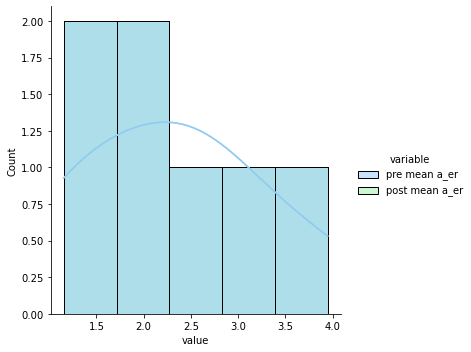

In [153]:
#a_er histograms
sns.displot(data=kap_data_sd_tidy[kap_data_sd_tidy['variable'].isin(["pre mean a_er", "post mean a_er"])], x="value", hue="variable", bins=5, kde=True)

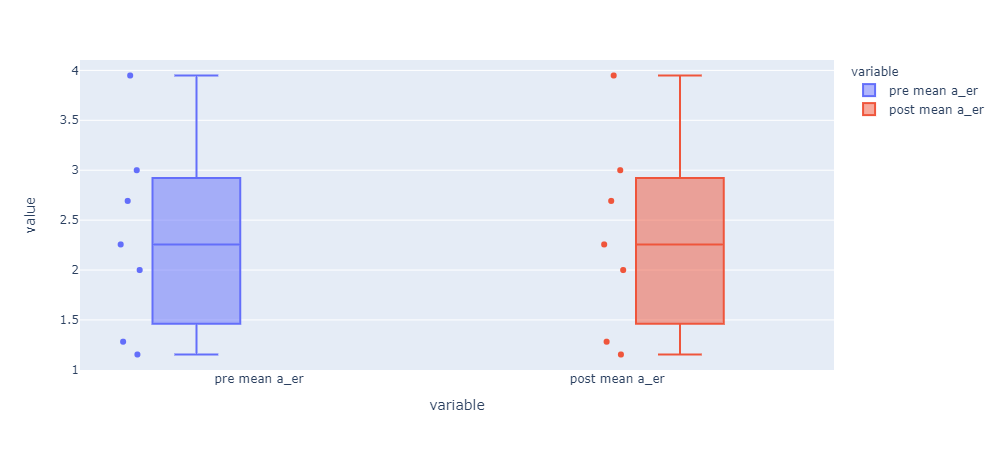

In [154]:
#a_er boxplots
fig = px.box(kap_data_sd_tidy[kap_data_sd_tidy['variable'].isin(["pre mean a_er", "post mean a_er"])], x="variable", y='value', color="variable", points="all")
fig.show()

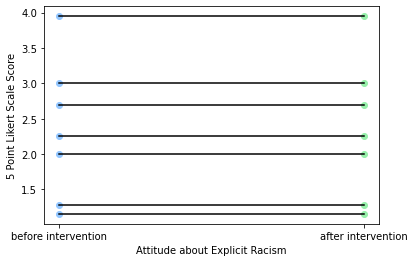

In [180]:
#a_er
#  input data:
befores = kap_data_sd['pre mean a_er']
afters = kap_data_sd['post mean a_er']

# plotting the points
plt.scatter(np.zeros(len(befores)), befores)
plt.scatter(np.ones(len(afters)), afters)

# plotting the lines
for i in range(len(befores)):
    plt.plot( [0,1], [befores[i], afters[i]], c='k')

plt.xticks([0,1], ['before intervention', 'after intervention'])
plt.xlabel("Attitude about Explicit Racism")
plt.ylabel("5 Point Likert Scale Score")

plt.show()

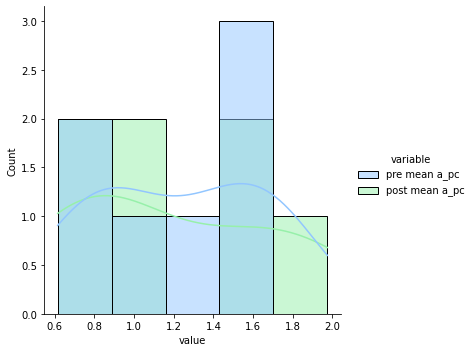

In [155]:
#a_pc histograms
sns.displot(kap_data_sd_tidy[kap_data_sd_tidy['variable'].isin(["pre mean a_pc", "post mean a_pc"])], x="value", hue="variable", bins=5, kde=True)

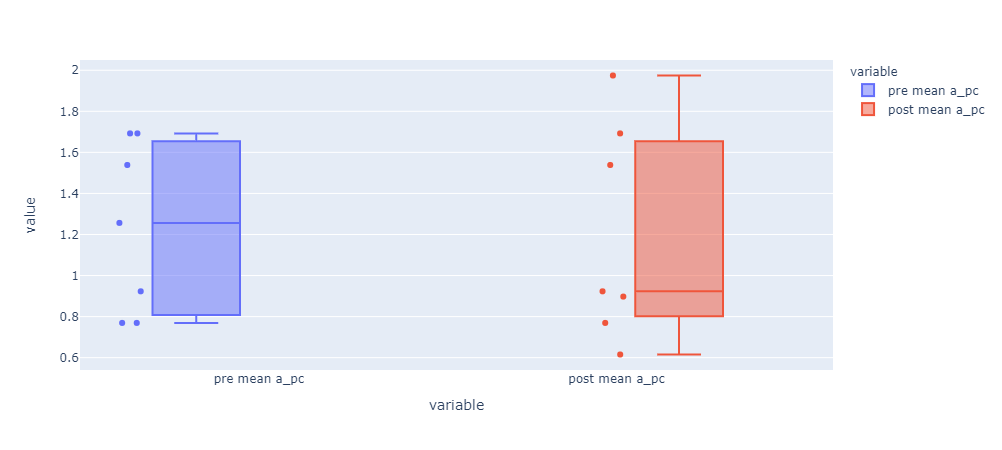

In [156]:
#a_pc boxplots
fig = px.box(kap_data_sd_tidy[kap_data_sd_tidy['variable'].isin(["pre mean a_pc", "post mean a_pc"])], x="variable", y='value', color="variable", points="all")
fig.show()

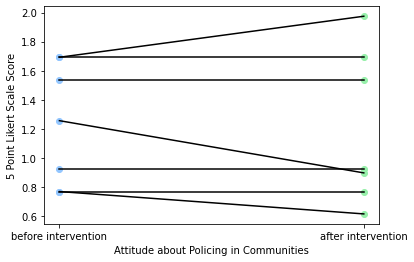

In [181]:
#a_pc
#  input data:
befores = kap_data_sd['pre mean a_pc']
afters = kap_data_sd['post mean a_pc']

# plotting the points
plt.scatter(np.zeros(len(befores)), befores)
plt.scatter(np.ones(len(afters)), afters)

# plotting the lines
for i in range(len(befores)):
    plt.plot( [0,1], [befores[i], afters[i]], c='k')

plt.xticks([0,1], ['before intervention', 'after intervention'])
plt.xlabel("Attitude about Policing in Communities")
plt.ylabel("5 Point Likert Scale Score")

plt.show()

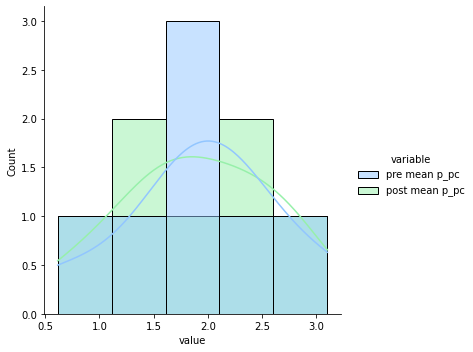

In [157]:
#p_pc histograms
sns.displot(kap_data_sd_tidy[kap_data_sd_tidy['variable'].isin(["pre mean p_pc", "post mean p_pc"])], x="value", hue="variable", bins=5, kde=True)

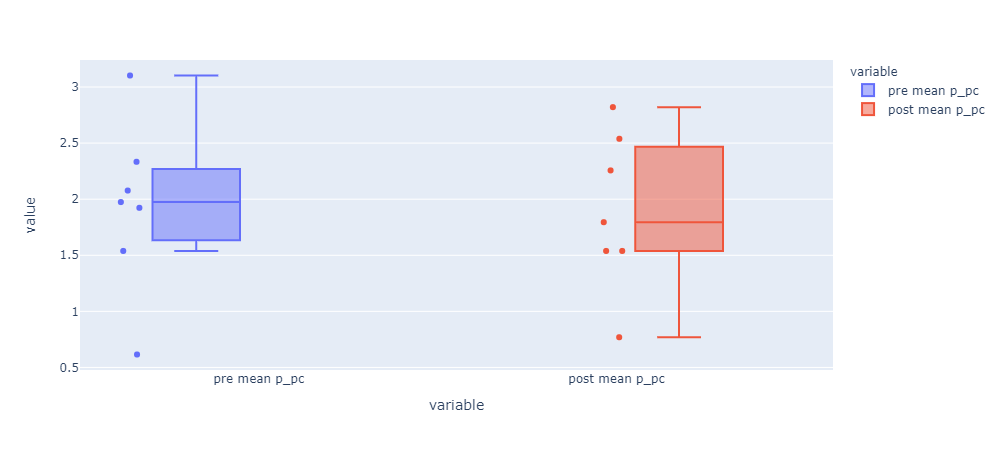

In [158]:
#p_pc boxplots
fig = px.box(kap_data_sd_tidy[kap_data_sd_tidy['variable'].isin(["pre mean p_pc", "post mean p_pc"])], x="variable", y='value', color="variable", points="all")
fig.show()

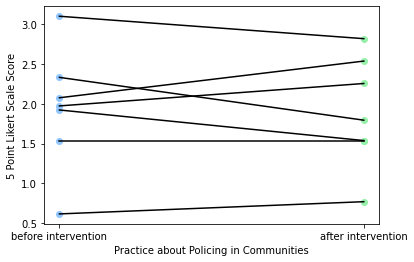

In [182]:
#p_pc
#  input data:
befores = kap_data_sd['pre mean p_pc']
afters = kap_data_sd['post mean p_pc']

# plotting the points
plt.scatter(np.zeros(len(befores)), befores)
plt.scatter(np.ones(len(afters)), afters)

# plotting the lines
for i in range(len(befores)):
    plt.plot( [0,1], [befores[i], afters[i]], c='k')

plt.xticks([0,1], ['before intervention', 'after intervention'])
plt.xlabel("Practice about Policing in Communities")
plt.ylabel("5 Point Likert Scale Score")

plt.show()

### ANOVA Test

#### ANOVA: Gender & KAP

In [266]:
#a_er gender ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean a_er', between='gender', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0  gender  0.709128   1  0.709128  0.696992  0.441848  0.122344
1  Within  5.087059   5  1.017412       NaN       NaN       NaN


In [267]:
#a_pc gender ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean a_pc', between='gender', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0  gender  0.004892   1  0.004892  0.014849  0.907759  0.002961
1  Within  1.647217   5  0.329443       NaN       NaN       NaN


In [268]:
#p_pc gender ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean p_pc', between='gender', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0  gender  0.116496   1  0.116496  0.206821  0.668334  0.039721
1  Within  2.816349   5  0.563270       NaN       NaN       NaN


In [269]:
#k_pc gender ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean k_pc', between='gender', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0  gender  0.084656   1  0.084656  5.714286  0.062352  0.533333
1  Within  0.074074   5  0.014815       NaN       NaN       NaN


#### ANOVA: Age & KAP

In [270]:
#a_er age ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean a_er', between='age', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0     age  1.708963   2  0.854482  0.836247  0.497247  0.294843
1  Within  4.087223   4  1.021806       NaN       NaN       NaN


In [271]:
#a_pc age ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean a_pc', between='age', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0     age  0.499358   2  0.249679  0.866377  0.486848  0.302255
1  Within  1.152750   4  0.288188       NaN       NaN       NaN


In [272]:
#p_pc age ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean p_pc', between='age', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0     age  1.555242   2  0.777621  2.257897  0.220633  0.530285
1  Within  1.377602   4  0.344401       NaN       NaN       NaN


In [273]:
#k_pc age ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean k_pc', between='age', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0     age  0.084656   2  0.042328  2.285714  0.217778  0.533333
1  Within  0.074074   4  0.018519       NaN       NaN       NaN


#### ANOVA: Race & KAP

In [274]:
#a_er race ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean a_er', between='race', detailed=True)
print(aov)

   Source        SS  DF        MS        F     p-unc       np2
0    race  1.365680   2  0.682840  0.61649  0.584281  0.235617
1  Within  4.430506   4  1.107627      NaN       NaN       NaN


In [275]:
#a_pc race ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean a_pc', between='race', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0    race  0.428440   2  0.214220  0.700255  0.548593  0.259329
1  Within  1.223669   4  0.305917       NaN       NaN       NaN


In [276]:
#p_pc race ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean p_pc', between='race', detailed=True)
print(aov)

   Source        SS  DF        MS         F     p-unc       np2
0    race  0.257763   2  0.128881  0.192714  0.831948  0.087888
1  Within  2.675082   4  0.668771       NaN       NaN       NaN


In [277]:
#k_pc race ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean k_pc', between='race', detailed=True)
print(aov)

   Source        SS  DF        MS         F   p-unc   np2
0    race  0.025397   2  0.012698  0.380952  0.7056  0.16
1  Within  0.133333   4  0.033333       NaN     NaN   NaN


#### ANOVA: Profession & KAP

In [278]:
#a_er profession ANOVA
# error atm bc only 1 category exists rn for "profession" as a result of who was tested
aov = pg.anova(data=kap_data_sd, dv='post mean a_er', between='profession', detailed=True)
print(aov)

       Source        SS  DF        MS  np2
0  profession  0.000000   0       NaN  0.0
1      Within  5.796187   6  0.966031  NaN


C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal



In [279]:
#a_pc profession ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean a_pc', between='profession', detailed=True)
print(aov)

       Source        SS  DF        MS  np2
0  profession  0.000000   0       NaN  0.0
1      Within  1.652109   6  0.275351  NaN


C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal



In [280]:
#p_pc profession ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean p_pc', between='profession', detailed=True)
print(aov)

       Source        SS  DF        MS  np2
0  profession  0.000000   0       NaN  0.0
1      Within  2.932845   6  0.488807  NaN


C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal



In [282]:
#k_pc profession ANOVA
aov = pg.anova(data=kap_data_sd, dv='post mean k_pc', between='profession', detailed=True)
print(aov)

       Source       SS  DF        MS  np2
0  profession  0.00000   0       NaN  0.0
1      Within  0.15873   6  0.026455  NaN


C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal



### ANCOVA Test

#### ANCOVA: Gender & KAP

In [211]:
#a_er gender ANCOVA

# Factor Variable: gender (male/female)
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean a_er', covar='pre mean a_er', between='gender')

,Source,SS,DF,F,p-unc,np2
0,gender,-8.881784e-15,1,-1.000000e+01,1.000000e+00,1.666667
1,pre mean a_er,5.087059e+00,1,5.727519e+15,1.829019e-31,1.000000
2,Residual,3.552714e-15,4,NaN,NaN,NaN


In [212]:
#a_pc gender ANCOVA

# Factor Variable: gender (male/female)
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean a_pc', covar='pre mean a_pc', between='gender')

,Source,SS,DF,F,p-unc,np2
0,gender,0.050619,1,1.465363,0.292714,0.268118
1,pre mean a_pc,1.509042,1,43.685155,0.002716,0.916116
2,Residual,0.138174,4,NaN,NaN,NaN


In [213]:
#p_pc gender ANCOVA

# Factor Variable: gender (male/female)
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean p_pc', covar='pre mean p_pc', between='gender')

,Source,SS,DF,F,p-unc,np2
0,gender,0.124335,1,0.876503,0.402165,0.179740
1,pre mean p_pc,2.248934,1,15.853883,0.016378,0.798528
2,Residual,0.567415,4,NaN,NaN,NaN


In [214]:
#k_pc gender ANCOVA

# Factor Variable: gender (male/female)
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean k_pc', covar='pre mean k_pc', between='gender')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1657: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:987: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:993: RuntimeWarning:

invalid value encountered in double_scalars



,Source,SS,DF,F,p-unc,np2
0,gender,NaN,1,NaN,NaN,NaN
1,pre mean k_pc,NaN,1,NaN,NaN,NaN
2,Residual,NaN,4,NaN,NaN,NaN


#### ANCOVA: Age & KAP

In [215]:
#a_er age ANCOVA

# Factor Variable: age
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean a_er', covar='pre mean a_er', between='age')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,age,-7.105427e-15,2,-6.000000e+00,1.000000e+00,1.333333
1,pre mean a_er,4.087223e+00,1,6.902707e+15,3.845401e-24,1.000000
2,Residual,1.776357e-15,3,NaN,NaN,NaN


In [216]:
#a_pc age ANCOVA

# Factor Variable: age
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean a_pc', covar='pre mean a_pc', between='age')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,age,0.066230,2,0.810554,0.523073,0.350805
1,pre mean a_pc,1.030187,1,25.215961,0.015212,0.893677
2,Residual,0.122564,3,NaN,NaN,NaN


In [217]:
#p_pc age ANCOVA

# Factor Variable: age
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean p_pc', covar='pre mean p_pc', between='age')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,age,0.123578,2,0.326250,0.744383,0.178645
1,pre mean p_pc,0.809430,1,4.273855,0.130575,0.587564
2,Residual,0.568173,3,NaN,NaN,NaN


In [218]:
#k_pc age ANCOVA

# Factor Variable: age
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean k_pc', covar='pre mean k_pc', between='age')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1657: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:987: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:993: RuntimeWarning:

invalid value encountered in doub

,Source,SS,DF,F,p-unc,np2
0,age,NaN,2,NaN,NaN,NaN
1,pre mean k_pc,NaN,1,NaN,NaN,NaN
2,Residual,NaN,3,NaN,NaN,NaN


#### ANCOVA: Race & KAP

In [219]:
#a_er race ANCOVA

# Factor Variable: race
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean a_er', covar='pre mean a_er', between='race')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,race,-7.105427e-15,2,-6.000000e+00,1.000000e+00,1.333333
1,pre mean a_er,4.430506e+00,1,7.482460e+15,3.407251e-24,1.000000
2,Residual,1.776357e-15,3,NaN,NaN,NaN


In [220]:
#a_pc race ANCOVA

# Factor Variable: race
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean a_pc', covar='pre mean a_pc', between='race')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,race,0.027940,2,0.260545,0.786441,0.147991
1,pre mean a_pc,1.062815,1,19.822043,0.021086,0.868548
2,Residual,0.160854,3,NaN,NaN,NaN


In [221]:
#p_pc race ANCOVA

# Factor Variable: race
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean p_pc', covar='pre mean p_pc', between='race')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned



,Source,SS,DF,F,p-unc,np2
0,race,0.229035,2,0.742473,0.547074,0.331096
1,pre mean p_pc,2.212367,1,14.343822,0.032282,0.827028
2,Residual,0.462715,3,NaN,NaN,NaN


In [222]:
#k_pc race ANCOVA

# Factor Variable: race
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean k_pc', covar='pre mean k_pc', between='race')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1657: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:987: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:993: RuntimeWarning:

invalid value encountered in doub

,Source,SS,DF,F,p-unc,np2
0,race,NaN,2,NaN,NaN,NaN
1,pre mean k_pc,NaN,1,NaN,NaN,NaN
2,Residual,NaN,3,NaN,NaN,NaN


#### ANCOVA: Profession & KAP

In [226]:
#a_er profession ANCOVA

# Factor Variable: profession
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean a_er', covar='pre mean a_er', between='profession')

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1678: RuntimeWarning:

invalid value encountered in double_scalars



,Source,SS,DF,F,p-unc,np2
0,profession,0.000000e+00,0,NaN,NaN,-0.0
1,pre mean a_er,5.796187e+00,1,-5.438272e+15,1.0,1.0
2,Residual,-5.329071e-15,5,NaN,NaN,NaN


In [227]:
#a_pc profession ANCOVA

# Factor Variable: profession
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean a_pc', covar='pre mean a_pc', between='profession')

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1678: RuntimeWarning:

invalid value encountered in double_scalars



,Source,SS,DF,F,p-unc,np2
0,profession,0.000000,0,NaN,NaN,0.000000
1,pre mean a_pc,1.463315,1,38.754431,0.001564,0.885726
2,Residual,0.188793,5,NaN,NaN,NaN


In [228]:
#p_pc profession ANCOVA

# Factor Variable: profession
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean p_pc', covar='pre mean p_pc', between='profession')

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1678: RuntimeWarning:

invalid value encountered in double_scalars



,Source,SS,DF,F,p-unc,np2
0,profession,0.000000,0,NaN,NaN,0.000000
1,pre mean p_pc,2.241094,1,16.19872,0.010073,0.764137
2,Residual,0.691750,5,NaN,NaN,NaN


In [229]:
#k_pc profession ANCOVA

# Factor Variable: profession
# Covariate: Pre intervention construct scores
# Response Variable: Post intervention construct scores

ancova(data=kap_data_sd, dv='post mean k_pc', covar='pre mean k_pc', between='profession')

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:1657: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RankWarning:

Polyfit may be poorly conditioned

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:985: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Carol\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\Carol\Anaconda3\lib\site-packages\pingouin\parametric.py:993: RuntimeWarning:

invalid value encountered in double_scalars



,Source,SS,DF,F,p-unc,np2
0,profession,NaN,0,NaN,NaN,NaN
1,pre mean k_pc,NaN,1,NaN,NaN,NaN
2,Residual,NaN,5,NaN,NaN,NaN


## Part 3: Integrating SGD Data into the Analysis

### Integrating SGD Data and Social Desirability Score

In [290]:
# gain insight into sgd_data
sgd_data.head()

,RandomID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q11,total mean sgd_effect,mean sgd_sf,mean sgd_u,mean sgd_tc,gender,age,race,profession,sd_score
0,1034343201,5,5,5,4,5,4,5,5,5,...,5,4.636364,5.000000,4.50,4.50,Male,18 - 24,White or Caucasian,Community member,0.538462
1,3489602219,4,5,5,5,5,4,4,5,5,...,5,4.636364,4.666667,4.50,4.75,Male,25 - 34,A race/ethnicity not listed here,Community member,0.384615
2,9025272566,5,5,5,5,5,5,4,5,5,...,5,4.818182,5.000000,4.75,4.75,Female,55 - 64,White or Caucasian,Community member,0.230769
3,6603259763,4,4,4,4,4,5,3,4,5,...,5,4.181818,4.000000,4.00,4.50,Female,18 - 24,White or Caucasian,Community member,0.692308
4,7671412241,4,2,5,4,2,5,4,5,2,...,3,3.636364,3.666667,3.75,3.50,Female,25 - 34,White or Caucasian,Community member,0.846154


In [291]:
# create sgd_data_sd dataframe from sgd_data
sgd_data_sd = sgd_data.copy(deep=True)

In [292]:
# apply the sd_score to "total mean sgd_effect", "mean sgd_sf", "mean sgd_u", and "mean sgd_tc"
sgd_data_sd['total mean sgd_effect'] =sgd_data_sd['mean sgd_sf']*sgd_data_sd['sd_score']
sgd_data_sd['mean sgd_sf'] =sgd_data_sd['mean sgd_sf']*sgd_data_sd['sd_score']
sgd_data_sd['mean sgd_u'] = sgd_data_sd['mean sgd_u']*sgd_data_sd['sd_score']
sgd_data_sd['mean sgd_tc'] = sgd_data_sd['mean sgd_tc']*sgd_data_sd['sd_score']


In [296]:
#gain insight into sgd_data_sd
sgd_data_sd.head(10)

,RandomID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q11,total mean sgd_effect,mean sgd_sf,mean sgd_u,mean sgd_tc,gender,age,race,profession,sd_score
0,1034343201,5,5,5,4,5,4,5,5,5,...,5,2.692308,2.692308,2.423077,2.423077,Male,18 - 24,White or Caucasian,Community member,0.538462
1,3489602219,4,5,5,5,5,4,4,5,5,...,5,1.794872,1.794872,1.730769,1.826923,Male,25 - 34,A race/ethnicity not listed here,Community member,0.384615
2,9025272566,5,5,5,5,5,5,4,5,5,...,5,1.153846,1.153846,1.096154,1.096154,Female,55 - 64,White or Caucasian,Community member,0.230769
3,6603259763,4,4,4,4,4,5,3,4,5,...,5,2.769231,2.769231,2.769231,3.115385,Female,18 - 24,White or Caucasian,Community member,0.692308
4,7671412241,4,2,5,4,2,5,4,5,2,...,3,3.102564,3.102564,3.173077,2.961538,Female,25 - 34,White or Caucasian,Community member,0.846154
5,7124352876,4,4,5,2,4,5,4,4,5,...,5,3.666667,3.666667,3.173077,4.019231,Male,18 - 24,Asian or Pacific Islander,Community member,0.846154
6,2782470529,5,4,5,5,4,4,5,5,4,...,5,2.153846,2.153846,2.076923,2.076923,Male,25 - 34,White or Caucasian,Community member,0.461538


In [295]:
# gain insight into "total mean sgd_effect", "mean sgd_sf", "mean sgd_u", and "mean sgd_tc"
sgd_data_sd[['total mean sgd_effect', 'mean sgd_sf', 'mean sgd_u', 'mean sgd_tc' ]].describe()

,total mean sgd_effect,mean sgd_sf,mean sgd_u,mean sgd_tc
count,7.000000,7.000000,7.000000,7.000000
mean,2.476190,2.476190,2.348901,2.502747
std,0.842501,0.842501,0.770946,0.958163
min,1.153846,1.153846,1.096154,1.096154
25%,1.974359,1.974359,1.903846,1.951923
50%,2.692308,2.692308,2.423077,2.423077
75%,2.935897,2.935897,2.971154,3.038462
max,3.666667,3.666667,3.173077,4.019231
